# K-Means Clustering (From Scratch + Sklearn)

### Objective:
To understand and implement the K-Means clustering algorithm:
1. From scratch using NumPy
2. Using sklearn
3. Visualize and compare results

This is an unsupervised learning algorithm used for grouping data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


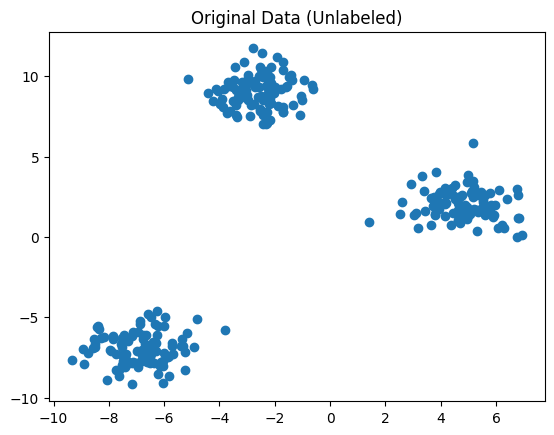

In [2]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualize data
plt.scatter(X[:, 0], X[:, 1])
plt.title("Original Data (Unlabeled)")
plt.show()

In [3]:
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.choice(len(X), k, replace=False)
    return X[random_indices]

In [4]:
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)


In [5]:
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)

In [6]:
def kmeans_from_scratch(X, k, iterations=100):
    centroids = initialize_centroids(X, k)

    for _ in range(iterations):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

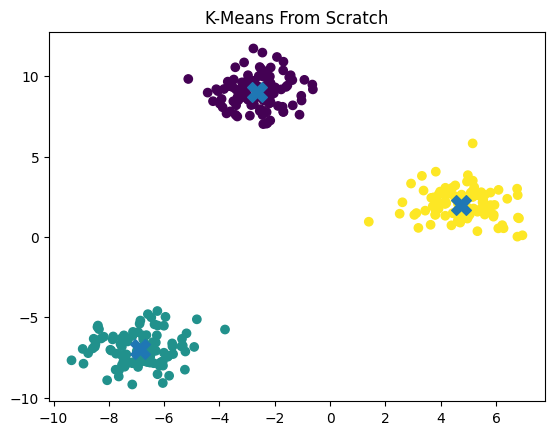

In [7]:
clusters_scratch, centroids_scratch = kmeans_from_scratch(X, k=3)

plt.scatter(X[:, 0], X[:, 1], c=clusters_scratch)
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], s=200, marker='X')
plt.title("K-Means From Scratch")
plt.show()

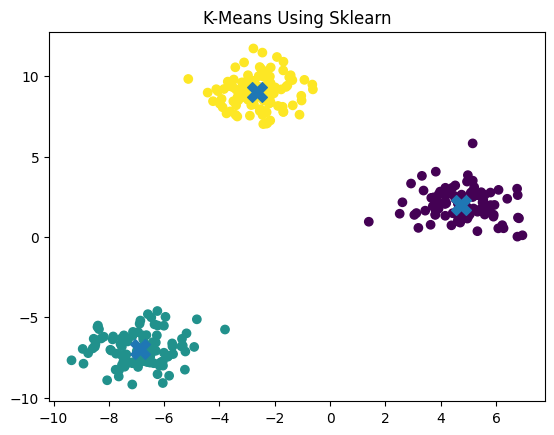

In [8]:
kmeans = KMeans(n_clusters=3)
clusters_sklearn = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters_sklearn)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X')
plt.title("K-Means Using Sklearn")
plt.show()

### Comparison:

| Feature | From Scratch | Sklearn |
|--------|--------------|---------|
| Speed | Slower | Faster |
| Learning Value | Very High | Medium |
| Code Complexity | High | Low |